In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Data Assimilation

___

# Preparatory doc for assessment


(a) We seek two temperatures, x1 and x2, in London and Paris. The climatologist gives us
an initial guess (based on climate records) of xb = (10, 5)T
, with background error


In [ ]:
B=np.array([[1,0.25],[0.25,1]]) 
y=4
xb=np.array([10,5])
R=0.25
H=np.array([0,1]).T

In [ ]:
def Var(B,H,R,y,xb):
    K=(B@H.T)*(1/(H@B@H.T+R))
    xhat=xb+K*(y-H@xb)
    return xhat,K

In [ ]:
xhat1,k1=Var(B,H,R,y,xb)
xhat1

array([9.8, 4.2])

__________

(b) We seek monthly rainfall estimates in Kigali. The climatologist gives us initial guesses
based on climate records of average monthly rainfall in Table 1 below. Table 1 also
contains observations of average monthly rainfall recorded at the airport in 2019.

_____

(i). Assume that the background error variance is 0.1mm for all months, and the observation error variance is 0.25mm for all months. Use 3DVar to find optimal estimates
of monthly rainfall in 2019. Plot your optimal estimates, together with the data and
background as points. Use a legend for your plot and describe how the estimates
compare with the background and data.

In [ ]:
B1=0.1*np.eye(12) # Background error variance matrix
R1=0.25*np.eye(12) # Observation error variance matrix
Y1=np.array([80,90,110,160,80,20,10,40,70,100,110,80]) # Observations From the table given in the question
xb1=np.array([76.9,91,114.2,154.2,88.1,18.6,11.4,31.1,69.6,105.7,112.7,77.4]) # Background From the table given in the question
H1=np.eye(12) # Matrix  H


In [ ]:
def Var1(B,H,R,y,xb):
    K=(B@H.T)@(np.linalg.inv(H@B@H.T+R))
    xhat=xb+K@(y-H@xb)
    return xhat,K 

In [ ]:
xhat2,K2=Var1(B1,H1,R1,Y1,xb1)
xhat2

array([ 77.78571429,  90.71428571, 113.        , 155.85714286,
        85.78571429,  19.        ,  11.        ,  33.64285714,
        69.71428571, 104.07142857, 111.92857143,  78.14285714])

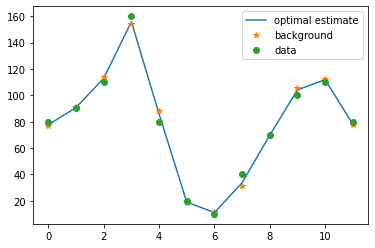

In [ ]:
plt.plot(xhat2,'-',label='optimal estimate')
plt.plot(xb1,'*',label='background')
plt.plot(Y1,'o',label='data')
plt.legend()

______________

(ii). Assume that the background error variance is 0.25mm for all months, and the
observation error variance remains at 0.25mm for all months. Plot optimal estimates
of monthly rainfall in 2019, together with the data and background. Describe how
the estimates compare with the background and data.


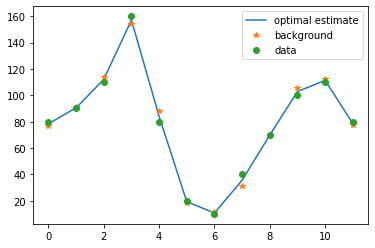

In [ ]:
R2=0.25*np.eye(12)
Y2=np.array([80,90,110,160,80,20,10,40,70,100,110,80])
xb2=np.array([76.9,91,114.2,154.2,88.1,18.6,11.4,31.1,69.6,105.7,112.7,77.4])
H2=np.eye(12)
B2=0.25*np.eye(12)
xhat3,K3=Var1(B2,H2,R2,Y2,xb2)
plt.plot(xhat3,'-',label='optimal estimate')
plt.plot(xb2,'*',label='background')
plt.plot(Y2,'o',label='data')
plt.legend()

_____________

(iii). Assume that there are no observations for July and August, and that the background
and observation error variances are still 0.25mm for all months. Adjust H to reflect
that there are no observations in July and August. Plot optimal estimates of monthly
rainfall in 2019, together with the data and background. Describe how the estimates
compare with the background and data

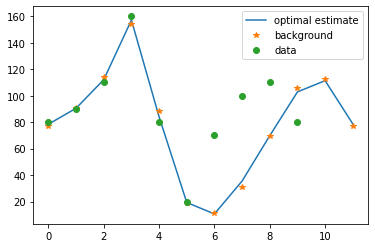

In [ ]:
R3=0.25*np.eye(10)
Y3=np.array([80,90,110,160,80,20,70,100,110,80])
xb3=np.array([76.9,91,114.2,154.2,88.1,18.6,11.4,31.1,69.6,105.7,112.7,77.4])
H3=np.zeros((10,12))
for i in range(6):
    H3[i,i]=1
for i in range(4):
    H3[9-i,11-i]=1
    

B3=0.25*np.diag(np.ones(11),-1)+0.25*np.diag(np.ones(12))+0.25*np.diag(np.ones(11),1)
xhat4,K4=Var1(B3,H3,R3,Y3,xb3)
plt.plot(xhat3,'-',label='optimal estimate')
plt.plot(xb3,'*',label='background')
plt.plot(Y3,'o',label='data')
plt.legend()

# 2021

In [ ]:
sigma_x=np.array([[1,0.25],[0.25,1]])  # Sigma x
sigma_x

array([[1.  , 0.25],
       [0.25, 1.  ]])

In [ ]:
mu=np.array([21.5,17.9])
mu

array([21.5, 17.9])

In [ ]:
sigma_y=0.25 # Sigma y

In [ ]:
H=np.array([1,0])
H

array([1, 0])

In [ ]:
def mu_star(mu,k,y,H):
    mu_star=mu+k@(27-H@mu)
    return mu_star

In [ ]:
I=np.eye(2,2)

In [ ]:
def sigma_star(I,k,H,sigma_x)   : 
    sigma_star=(I-k@H)@sigma_x
    return sigma_star

# 2021/2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
sns.set_theme(style="whitegrid")

In [ ]:
def process(alpha,q):
    X0 = np.random.normal(0,1)
    X = np.zeros(30)
    X[0] = X0
    for i in range (1,30):
        delta = np.random.normal(0,q)
        X[i] = alpha * X[i-1] + delta
    return X

In [ ]:
def data(X,r,T1,T2,T):
    n = len(X)
    Y = np.zeros(n)
    for i in range(0,n):
        epsilon = np.random.normal(0,r)
        if i in range(0,T1+1):
            Y[i]=X[i]+epsilon
        if i in range(T1,T2+1):
            Y[i]=0.1*X[i]+epsilon
        if i in range(T2,T+1):
            Y[i]=X[i]+epsilon
    return Y

In [ ]:
alpha=0.8
q=0.4
r=0.1
T=30
T1=10
T2=20
X=process(alpha,q)
Y=data(X,r,T1,T2,T)

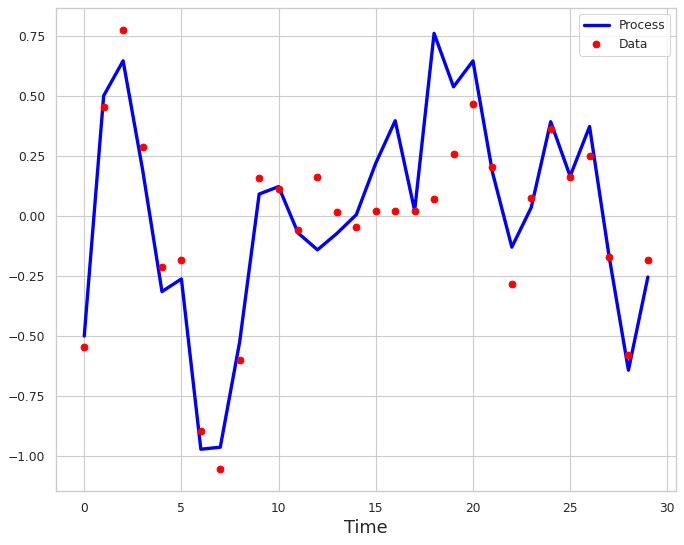

In [ ]:
plt.figure(figsize=(10,8), dpi = 80)
plt.plot(X,lw=3, color ='blue',label='Process')
plt.plot(Y, 'o',lw=3,color='red',label='Data')
plt.xlabel('Time',fontsize=16)
plt.legend()
plt.show()

In [ ]:
def Kalman_filter(M,Q,R,H,y,mu0,sigma0):
    N = len(y)
    mu_old = np.zeros(N)
    sigma_old = np.zeros(N)
    mu_new = np.zeros(N+1)
    mu_new[0] = mu0
    sigma_new = np.zeros(N+1)
    sigma_new[0] = sigma0
    for t in range(1,N+1):
        mu_old[t-1] = M*mu_new[t-1]
        sigma_old[t-1] = Q + M*sigma_new[t-1]*M
        k = sigma_old[t-1]*H*(H*sigma_old[t-1]*H + R)**-1
        mu_new[t] = mu_old[t-1] + k*(y[t-1] - H*mu_old[t-1])
        sigma_new[t] = (1 - k*H)*sigma_old[t-1] 
    return mu_old, mu_new[1:], sigma_old, sigma_new[1:],k

In [ ]:
q=0.4
r=0.1
alpha=0.8
mu0 =0
sigma0=1
Q = q**2
R = r**2
H = 1
mu_old,mu_new,sigma_old,sigma_new,k = Kalman_filter(alpha,Q,R,H,Y,mu0,sigma0)

In [ ]:
def Estimation(mu_old,mu_new,sigma_old,sigma_new,y):
    N = len(y)
    Xfrc = np.zeros(N)
    Xfilt = np.zeros(N)
    for t in range(0,N):
        Xfrc[t] = np.random.normal(mu_old[t],np.sqrt(sigma_old[t]))
        Xfilt[t] = np.random.normal(mu_new[t],np.sqrt(sigma_new[t]))
    return Xfrc , Xfilt

In [ ]:
Xfrc,Xfilt = Estimation(mu_old,mu_new,sigma_old,sigma_new,Y)

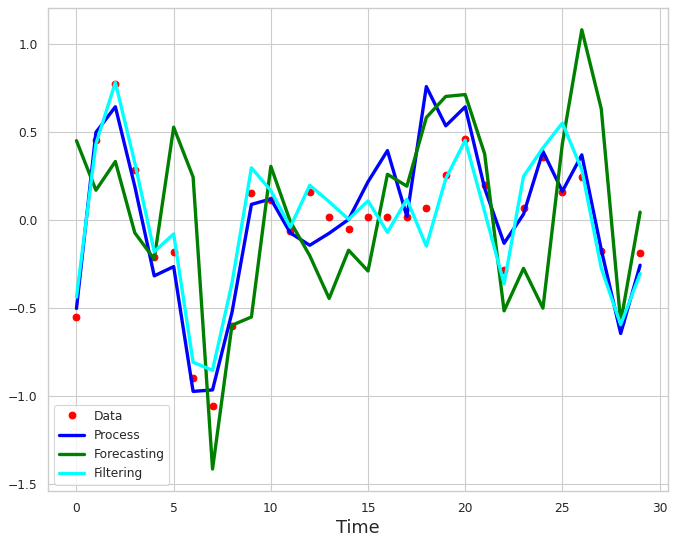

In [ ]:
plt.figure(figsize=(10,8), dpi = 80)
plt.plot(Y,'o',lw=3, label = 'Data', color='red')
plt.plot(X,lw=3,label = 'Process', color ='blue')
plt.plot(Xfrc,lw=3, label = 'Forecasting', color ='green')
plt.plot(Xfilt,lw=3, label = 'Filtering', color='cyan')
plt.xlabel('Time',fontsize=16)
plt.legend()
plt.show()

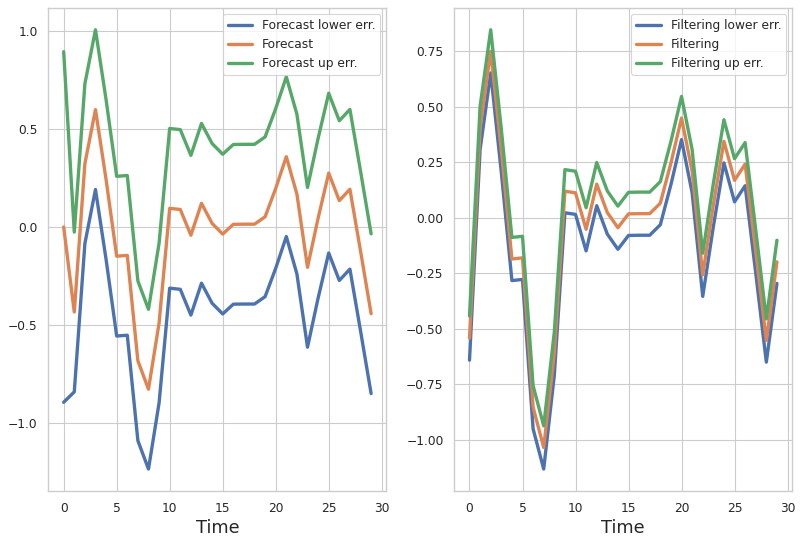

In [ ]:
plt.figure(figsize=(12,8), dpi = 80)
plt.subplot(1,2,1)
plt.plot(mu_old-np.sqrt(sigma_old),lw=3,label='Forecast lower err.')
plt.plot(mu_old,lw=3,label='Forecast')
plt.plot(mu_old+np.sqrt(sigma_old),lw=3,label='Forecast up err.') 
plt.legend()
plt.xlabel('Time',fontsize=16)
plt.subplot(1,2,2)
plt.plot(mu_new-np.sqrt(sigma_new),lw=3,label='Filtering lower err.')
plt.plot(mu_new,lw=3,label='Filtering')
plt.plot(mu_new+np.sqrt(sigma_new),lw=3,label='Filtering up err.')
plt.xlabel('Time',fontsize=16)
plt.legend()
plt.show()


In [ ]:
def process_NL(alpha,q):
    X0 = np.random.normal(0.1,0.01)
    X = np.zeros(50)
    X[0] = X0
    for i in range (1,50):
        delta = np.random.normal(0,q)
        X[i] = alpha * X[i-1]*(1-X[i-1]) + delta
    return X

In [ ]:
def data_NL(X,r):
    n = len(X)
    Y = np.zeros(n)
    for i in range(0,n):
        epsilon = np.random.normal(0,r)
        Y[i]=X[i]+epsilon
    return Y

In [ ]:
alpha=0.9
q=0.001
r=0.005
X_NL=process_NL(alpha,q)
Y_NL=data_NL(X_NL,r)

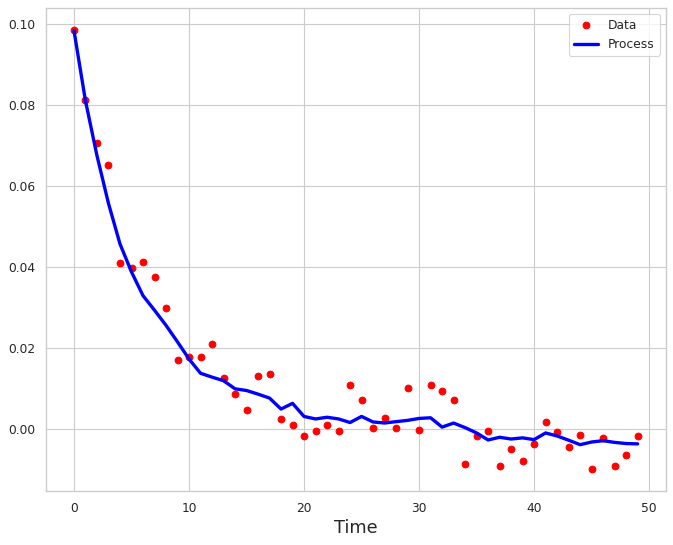

In [ ]:
plt.figure(figsize=(10,8), dpi = 80)
plt.plot(Y_NL,'o',lw=3,color='red',label='Data')
plt.plot(X_NL,lw=3, color ='blue',label='Process')
plt.xlabel('Time',fontsize=16)
plt.legend()
plt.show()

In [ ]:
def approx(alpha0,process_NL):
    M1=np.zeros(len(process_NL))
    for i in range(50):
        M1[i]=alpha0*(1-2*process_NL[i])
    return M1

In [ ]:
def Ext_Kalman_filter(M,M1,Q,R,H,y,mu0,sigma0):
    N = len(y)
    mu_old = np.zeros(N)
    sigma_old = np.zeros(N)
    mu_new = np.zeros(N+1)
    mu_new[0] = mu0
    sigma_new = np.zeros(N+1)
    sigma_new[0] = sigma0
    for t in range(1,N+1):
        mu_old[t-1] = M*mu_new[t-1]
        sigma_old[t-1] = Q + M1[t-1]*sigma_new[t-1]*M1[t-1]
        k = sigma_old[t-1]*H*(H*sigma_old[t-1]*H + R)**-1
        mu_new[t] = mu_old[t-1] + k*(y[t-1] - H*mu_old[t-1])
        sigma_new[t] = (1 - k*H)*sigma_old[t-1] 
    return mu_old, mu_new[1:], sigma_old, sigma_new[1:],k

In [ ]:
q=0.001
r=0.005
mu0 =0.1
sigma0=0.01
Q = q**2
R = r**2
H = 1
alpha=0.9

X_NL=process_NL(alpha,q)

M1=approx(alpha,X_NL)
mu_old,mu_new,sigma_old,sigma_new,k = Ext_Kalman_filter(alpha,M1,Q,R,H,Y_NL,mu0,sigma0)

In [ ]:
def Estimation(mu_old,mu_new,sigma_old,sigma_new,y):
    N = len(y)
    Xfrc = np.zeros(N)
    Xfilt = np.zeros(N)
    for t in range(0,N):
        Xfrc[t] = np.random.normal(mu_old[t],np.sqrt(sigma_old[t]))
        Xfilt[t] = np.random.normal(mu_new[t],np.sqrt(sigma_new[t]))
    return Xfrc , Xfilt

In [ ]:
Xfrc_NL,Xfilt_NL = Estimation(mu_old,mu_new,sigma_old,sigma_new,Y_NL)

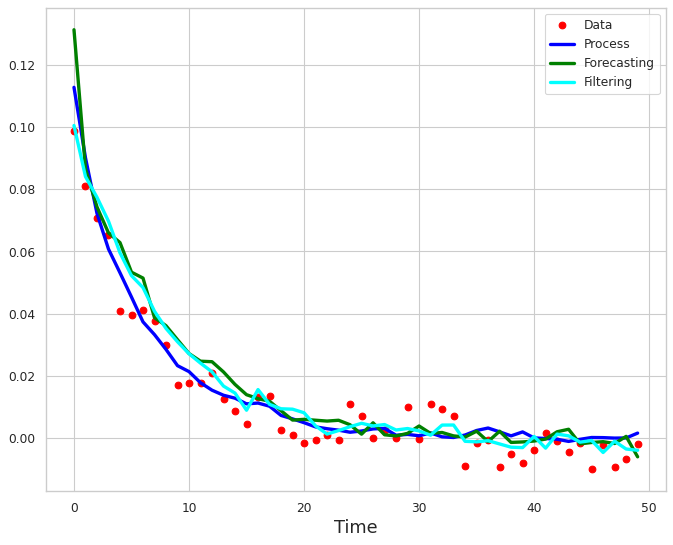

In [ ]:
plt.figure(figsize=(10,8), dpi = 80)
plt.plot(Y_NL,'o',lw=3, label = 'Data', color='red')
plt.plot(X_NL,lw=3,label = 'Process', color ='blue')
plt.plot(Xfrc_NL,lw=3, label = 'Forecasting', color ='green')
plt.plot(Xfilt_NL,lw=3, label = 'Filtering', color='cyan')
plt.xlabel('Time',fontsize=16)
plt.legend()
plt.show()

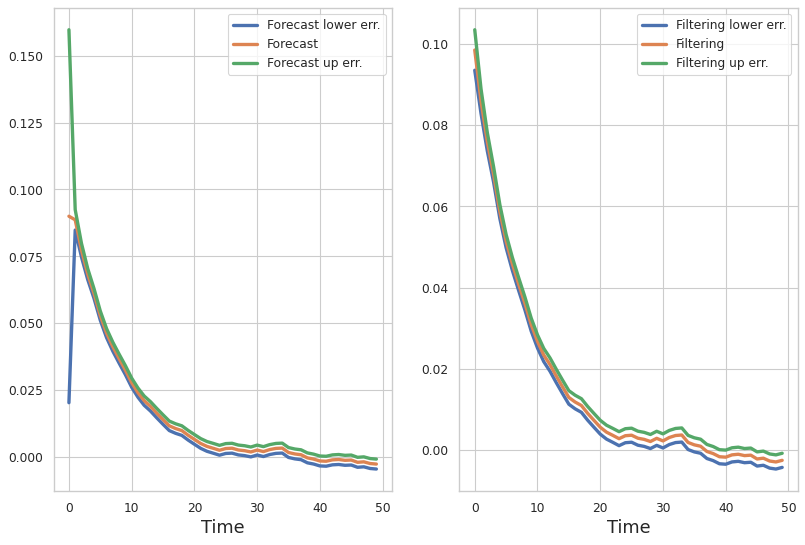

In [ ]:
plt.figure(figsize=(12,8), dpi = 80)
plt.subplot(1,2,1)
plt.plot(mu_old-np.sqrt(sigma_old),lw=3,label='Forecast lower err.')
plt.plot(mu_old,lw=3,label='Forecast')
plt.plot(mu_old+np.sqrt(sigma_old),lw=3,label='Forecast up err.') 
plt.xlabel('Time',fontsize=16)
plt.legend()
plt.subplot(1,2,2)
plt.plot(mu_new-np.sqrt(sigma_new),lw=3,label='Filtering lower err.')
plt.plot(mu_new,lw=3,label='Filtering')
plt.plot(mu_new+np.sqrt(sigma_new),lw=3,label='Filtering up err.')
plt.xlabel('Time',fontsize=16)
plt.legend()
plt.show()
